In [3]:
import json
import requests
import pandas as pd


# Lien alternatif pour un dataset de sarcasme
url = "https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json"
response = requests.get(url)

with open('sarcasm.json', 'w') as f:
    json.dump(response.json(), f)

In [4]:
## Import data
with open('sarcasm.json', 'r') as f:
    data = json.load(f)
print(f"Nombre d'entrées: {len(data)}")
df = pd.DataFrame(data)
df.head()


Nombre d'entrées: 26709


article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0

In [5]:
df.to_csv('sarcasm.csv',index=False)

#### Approche1

In [6]:
labels = df['is_sarcastic'].values
sentences =df.drop(columns=['is_sarcastic','article_link']).values.flatten()

In [7]:
sentences[:5], labels[:5]

(array(["former versace store clerk sues over secret 'black code' for minority shoppers",
        "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
        "mom starting to fear son's web series closest thing she will have to grandchild",
        'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
        'j.k. rowling wishes snape happy birthday in the most magical way'],
       dtype=object),
 array([0, 0, 1, 1, 0], dtype=int64))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
(word_index)

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'this': 19,
 'by': 20,
 'after': 21,
 'up': 22,
 'out': 23,
 'be': 24,
 'how': 25,
 'as': 26,
 'it': 27,
 'that': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'his': 32,
 'what': 33,
 'he': 34,
 'all': 35,
 'just': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'more': 40,
 'one': 41,
 'into': 42,
 'report': 43,
 'year': 44,
 'why': 45,
 'have': 46,
 'area': 47,
 'over': 48,
 'donald': 49,
 'u': 50,
 'day': 51,
 'says': 52,
 's': 53,
 'can': 54,
 'first': 55,
 'woman': 56,
 'time': 57,
 'like': 58,
 'her': 59,
 "trump's": 60,
 'old': 61,
 'no': 62,
 'get': 63,
 'off': 64,
 'an': 65,
 'life': 66,
 'people': 67,
 'obama': 68,
 'now': 69,
 'house': 70,
 'still': 71,
 "'": 72,
 'women': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'white': 77,
 'back': 78,
 'my': 79,
 'i': 80,
 'clinton': 81,
 '

In [10]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

In [11]:
print(padded)

[[308   1 679 ...   0   0   0]
 [  4   1   1 ...   0   0   0]
 [145 838   2 ...   0   0   0]
 ...
 [  1   9  68 ...   0   0   0]
 [  1 392   1 ...   0   0   0]
 [  1   1   6 ...   0   0   0]]


In [12]:
padded.shape


(26709, 40)

In [13]:
print(labels)

[0 0 1 ... 0 0 0]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.3, random_state=42)

In [16]:
# Modèle simple
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Évaluation
predictions = model.predict(X_test)
print(f"Précision: {accuracy_score(y_test, predictions):.2f}")

Précision: 0.57


c:\Users\0000\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Approche 2: Utilisons les embdedings avec les stop_words...les Lemmatisation

In [17]:
### Approche 2: Utilisons les embdedings avec les stop_words...les Lemmatisation
corpus = df['headline']
corpus

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [18]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Bibliothèques pour le NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Téléchargement des ressources NLTK (CORRECTION)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')

# Téléchargement spécifique pour la nouvelle version de NLTK
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\0000\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
df = pd.read_csv('sarcasm.csv')

In [20]:
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Ajout de stop words spécifiques
        self.stop_words.update(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
    
    def clean_text(self, text):
        # Conversion en minuscules
        text = text.lower()
        
        # Suppression de la ponctuation et des caractères spéciaux
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Suppression des stop words et lemmatisation
        cleaned_tokens = [
            self.lemmatizer.lemmatize(token) 
            for token in tokens 
            if token not in self.stop_words and len(token) > 2
        ]
        
        return ' '.join(cleaned_tokens)

# Application du prétraitement
preprocessor = TextPreprocessor()

print("\nAvant le prétraitement:")
print(df['headline'].iloc[0])

df['cleaned_headline'] = df['headline'].apply(preprocessor.clean_text)

print("\nAprès le prétraitement:")
print(df['cleaned_headline'].iloc[0])
print("\nDataset avec texte nettoyé:")
print(df[['headline', 'cleaned_headline', 'is_sarcastic']])


Avant le prétraitement:
former versace store clerk sues over secret 'black code' for minority shoppers

Après le prétraitement:
former versace store clerk sue secret black code minority shopper

Dataset avec texte nettoyé:
                                                headline  \
0      former versace store clerk sues over secret 'b...   
1      the 'roseanne' revival catches up to our thorn...   
2      mom starting to fear son's web series closest ...   
3      boehner just wants wife to listen, not come up...   
4      j.k. rowling wishes snape happy birthday in th...   
...                                                  ...   
26704               american politics in moral free-fall   
26705                            america's best 20 hikes   
26706                              reparations and obama   
26707  israeli ban targeting boycott supporters raise...   
26708                  gourmet gifts for the foodie 2014   

                                        cleaned_headlin

In [21]:
# Paramètres
vocab_size = 5000  # Réduit car le texte est plus propre
max_length = 15    # Réduit car moins de mots après suppression stop words
oov_tok = "<OOV>"
padding_type = 'post'
trunc_type = 'post'

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['cleaned_headline'])

# Création des séquences
sequences = tokenizer.texts_to_sequences(df['cleaned_headline'])
X = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y = df['is_sarcastic'].values

print("Séquences après prétraitement avancé:")
for i in range(len(sequences)):
    print(f"Original: {df['headline'].iloc[i][:50]}...")
    print(f"Nettoyé: {df['cleaned_headline'].iloc[i]}")
    print(f"Séquence: {sequences[i]}")
    print("---")

Séquences après prétraitement avancé:
Original: former versace store clerk sues over secret 'black...
Nettoyé: former versace store clerk sue secret black code minority shopper
Séquence: [239, 1, 489, 2675, 1162, 206, 44, 1748, 1922, 3505]
---
Original: the 'roseanne' revival catches up to our thorny po...
Nettoyé: roseanne revival catch thorny political mood better worse
Séquence: [1, 3044, 1123, 1, 335, 2676, 188, 888]
---
Original: mom starting to fear son's web series closest thin...
Nettoyé: mom starting fear son web series closest thing grandchild
Séquence: [46, 769, 469, 135, 1923, 508, 4160, 27, 4648]
---
Original: boehner just wants wife to listen, not come up wit...
Nettoyé: boehner want wife listen come alternative debt reduction idea
Séquence: [1234, 38, 261, 1552, 105, 2379, 1201, 1, 212]
---
Original: j.k. rowling wishes snape happy birthday in the mo...
Nettoyé: rowling wish snape happy birthday magical way
Séquence: [3506, 387, 1, 490, 460, 1163, 23]
---
Original: advan

In [22]:
# Exploration du vocabulaire
word_index = tokenizer.word_index
print(f"Taille du vocabulaire après nettoyage: {len(word_index)}")

# Fonction de décodage
def decode_sequence(sequence):
    reverse_word_index = {v: k for k, v in word_index.items()}
    return ' '.join([reverse_word_index.get(i, '?') for i in sequence if i != 0])

print("\nComparaison avant/après prétraitement:")
for i in range(3):
    print(f"Avant: {df['headline'].iloc[i]}")
    print(f"Après: {decode_sequence(sequences[i])}")
    print("---")

Taille du vocabulaire après nettoyage: 21904

Comparaison avant/après prétraitement:
Avant: former versace store clerk sues over secret 'black code' for minority shoppers
Après: former <OOV> store clerk sue secret black code minority shopper
---
Avant: the 'roseanne' revival catches up to our thorny political mood, for better and worse
Après: <OOV> revival catch <OOV> political mood better worse
---
Avant: mom starting to fear son's web series closest thing she will have to grandchild
Après: mom starting fear son web series closest thing grandchild
---


In [23]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Distribution des labels - Train: {np.unique(y_train, return_counts=True)}")
print(f"Distribution des labels - Test: {np.unique(y_test, return_counts=True)}")

Train set: (18696, 15)
Test set: (8013, 15)
Distribution des labels - Train: (array([0, 1], dtype=int64), array([10489,  8207], dtype=int64))
Distribution des labels - Test: (array([0, 1], dtype=int64), array([4496, 3517], dtype=int64))


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paramètres optimisés
embedding_dim = 50  # Réduit pour éviter l'overfitting
lstm_units = 32     # Réduit
vocab_size = 5000   # Réduit
max_length = 12     # Réduit

# Reconstruction du modèle avec régularisation
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_length,
        mask_zero=True
    ),
    Bidirectional(LSTM(
        lstm_units, 
        return_sequences=True, 
        dropout=0.3,           # Augmenté
        recurrent_dropout=0.3, # Ajouté
        kernel_regularizer=l2(0.01)  # Régularisation L2
    )),
    GlobalMaxPooling1D(),
    Dense(24, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),  # Augmenté
    Dense(12, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Augmenté
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

c:\Users\0000\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# Callbacks optimisés
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,           # Augmenté
        restore_best_weights=True,
        verbose=1

    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,            # Augmenté
        min_lr=1e-7,
        verbose=1
    )
]

# Entraînement avec plus d'epochs mais early stopping
history = model.fit(
    X_train, y_train,
    epochs=200,                # Augmenté mais s'arrêtera tôt
    batch_size=16,             # Augmenté
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


c:\Users\0000\anaconda3\Lib\site-packages\keras\src\layers\layer.py:965: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


1169/1169 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5631 - loss: 1.0491 - val_accuracy: 0.5611 - val_loss: 0.6859 - learning_rate: 0.0010
Epoch 2/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5629 - loss: 0.6858 - val_accuracy: 0.5611 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 3/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5633 - loss: 0.6858 - val_accuracy: 0.5611 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 4/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5629 - loss: 0.6855 - val_accuracy: 0.5611 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 5/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5594 - loss: 0.6863 - val_accuracy: 0.5611 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 6/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5538 - loss: 0.6876 - val_accuracy: 0.5611 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 7/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0

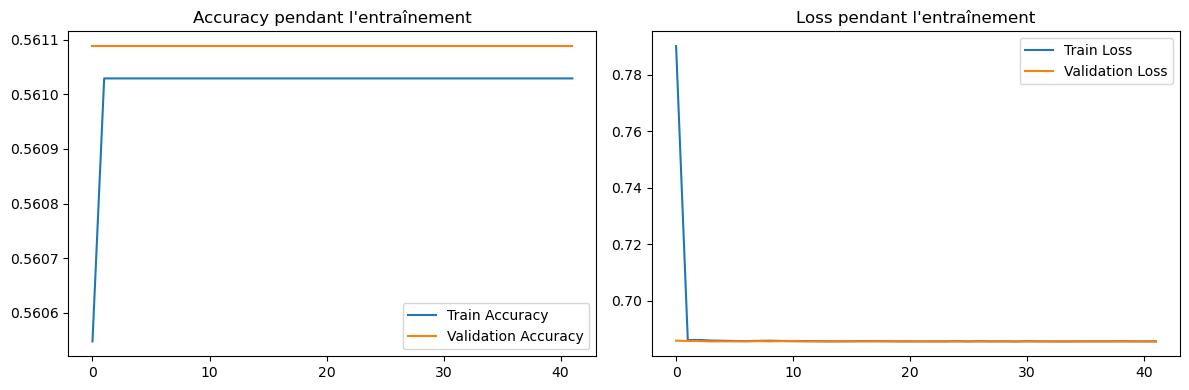

In [27]:
import matplotlib.pyplot as plt
# Courbes d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy pendant l\'entraînement')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss pendant l\'entraînement')
plt.legend()

plt.tight_layout()
plt.show()

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.4991 - precision: 0.7618 - recall: 0.7621

Performance finale:
Accuracy: 0.7913
Precision: 0.7567
Recall: 0.7731
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Rapport de classification:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4496
           1       0.76      0.77      0.76      3517

    accuracy                           0.79      8013
   macro avg       0.79      0.79      0.79      8013
weighted avg       0.79      0.79      0.79      8013



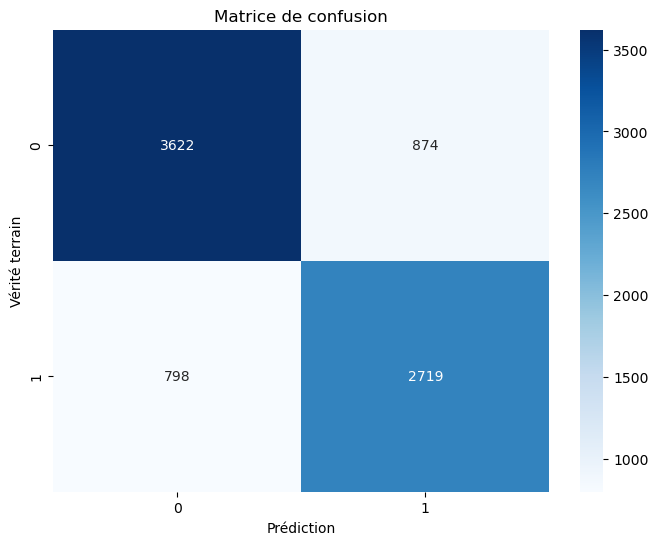

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Performance
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f"\nPerformance finale:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Prédictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction')
plt.show()

In [ ]:
def predict_sarcasm_advanced(text):
    # Prétraitement du texte
    cleaned_text = preprocessor.clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    # Prédiction
    prediction = model.predict(padded_sequence)[0][0]
    is_sarcastic = prediction > 0.5
    
    return {
        'text': text,
        'cleaned_text': cleaned_text,
        'probability': prediction,
        'is_sarcastic': bool(is_sarcastic),
        'classification': 'Sarcastique' if is_sarcastic else 'Non sarcastique',
        'confidence': 'Élevée' if abs(prediction - 0.5) > 0.3 else 'Moyenne'
    }

# Tests
test_texts = [
    "this is absolutely fantastic news",
    "oh wonderful, another pointless meeting",
    "i just love getting stuck in traffic for hours",
    "the weather is perfect today",
    "this software works exactly as expected, what a surprise",
    "My class is very interesting and engaging"
]

print("\nPrédictions sur de nouveaux textes:")
for text in test_texts:
    result = predict_sarcasm_advanced(text)
    print(f"Original: {result['text']}")
    print(f"Nettoyé: {result['cleaned_text']}")
    print(f"Résultat: {result['classification']} (confiance: {result['confidence']})")
    print(f"Probabilité: {result['probability']:.4f}")
    print("---")


Prédictions sur de nouveaux textes:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Original: this is absolutely fantastic news
Nettoyé: absolutely fantastic news
Résultat: Non sarcastique (confiance: Élevée)
Probabilité: 0.1133
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: oh wonderful, another pointless meeting
Nettoyé: wonderful another pointless meeting
Résultat: Non sarcastique (confiance: Moyenne)
Probabilité: 0.3299
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Original: i just love getting stuck in traffic for hours
Nettoyé: love getting stuck traffic hour
Résultat: Sarcastique (confiance: Moyenne)
Probabilité: 0.6969
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: the weather is perfect today
Nettoyé: weather perfect today
Résultat: Non sarcastique (confiance: Élevée)
Probabilité: 0.1580
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Original: this software works exactly as expected, what a surprise
Nettoyé: software work exactly expected surprise
Résultat: Sarcastique (confiance: Moy